In [38]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import time
import warnings
warnings.filterwarnings("ignore")

In [39]:
# variables
data_path = os.path.join("..", "data")
img_path = os.path.join("..", "static", "images")

nt = "#61BED6"
nf = "#A386B4"
sj = "#56AC8A"
sp = "#DFC10C"

colors_d = {
    "ENTP": nt,
    "INTP": nt,
    "INTJ": nt,
    "ENTJ": nt,
    "INFJ": nf,
    "ENFJ": nf,
    "INFP": nf,
    "ENFP": nf,
    "ISFJ": sj,
    "ISTJ": sj,
    "ESTJ": sj,
    "ESFJ": sj,
    "ISFP": sp,
    "ISTP": sp,
    "ESTP": sp,
    "ESFP": sp,
}

In [40]:
personality_data = pd.read_csv("clean_data_3.csv")

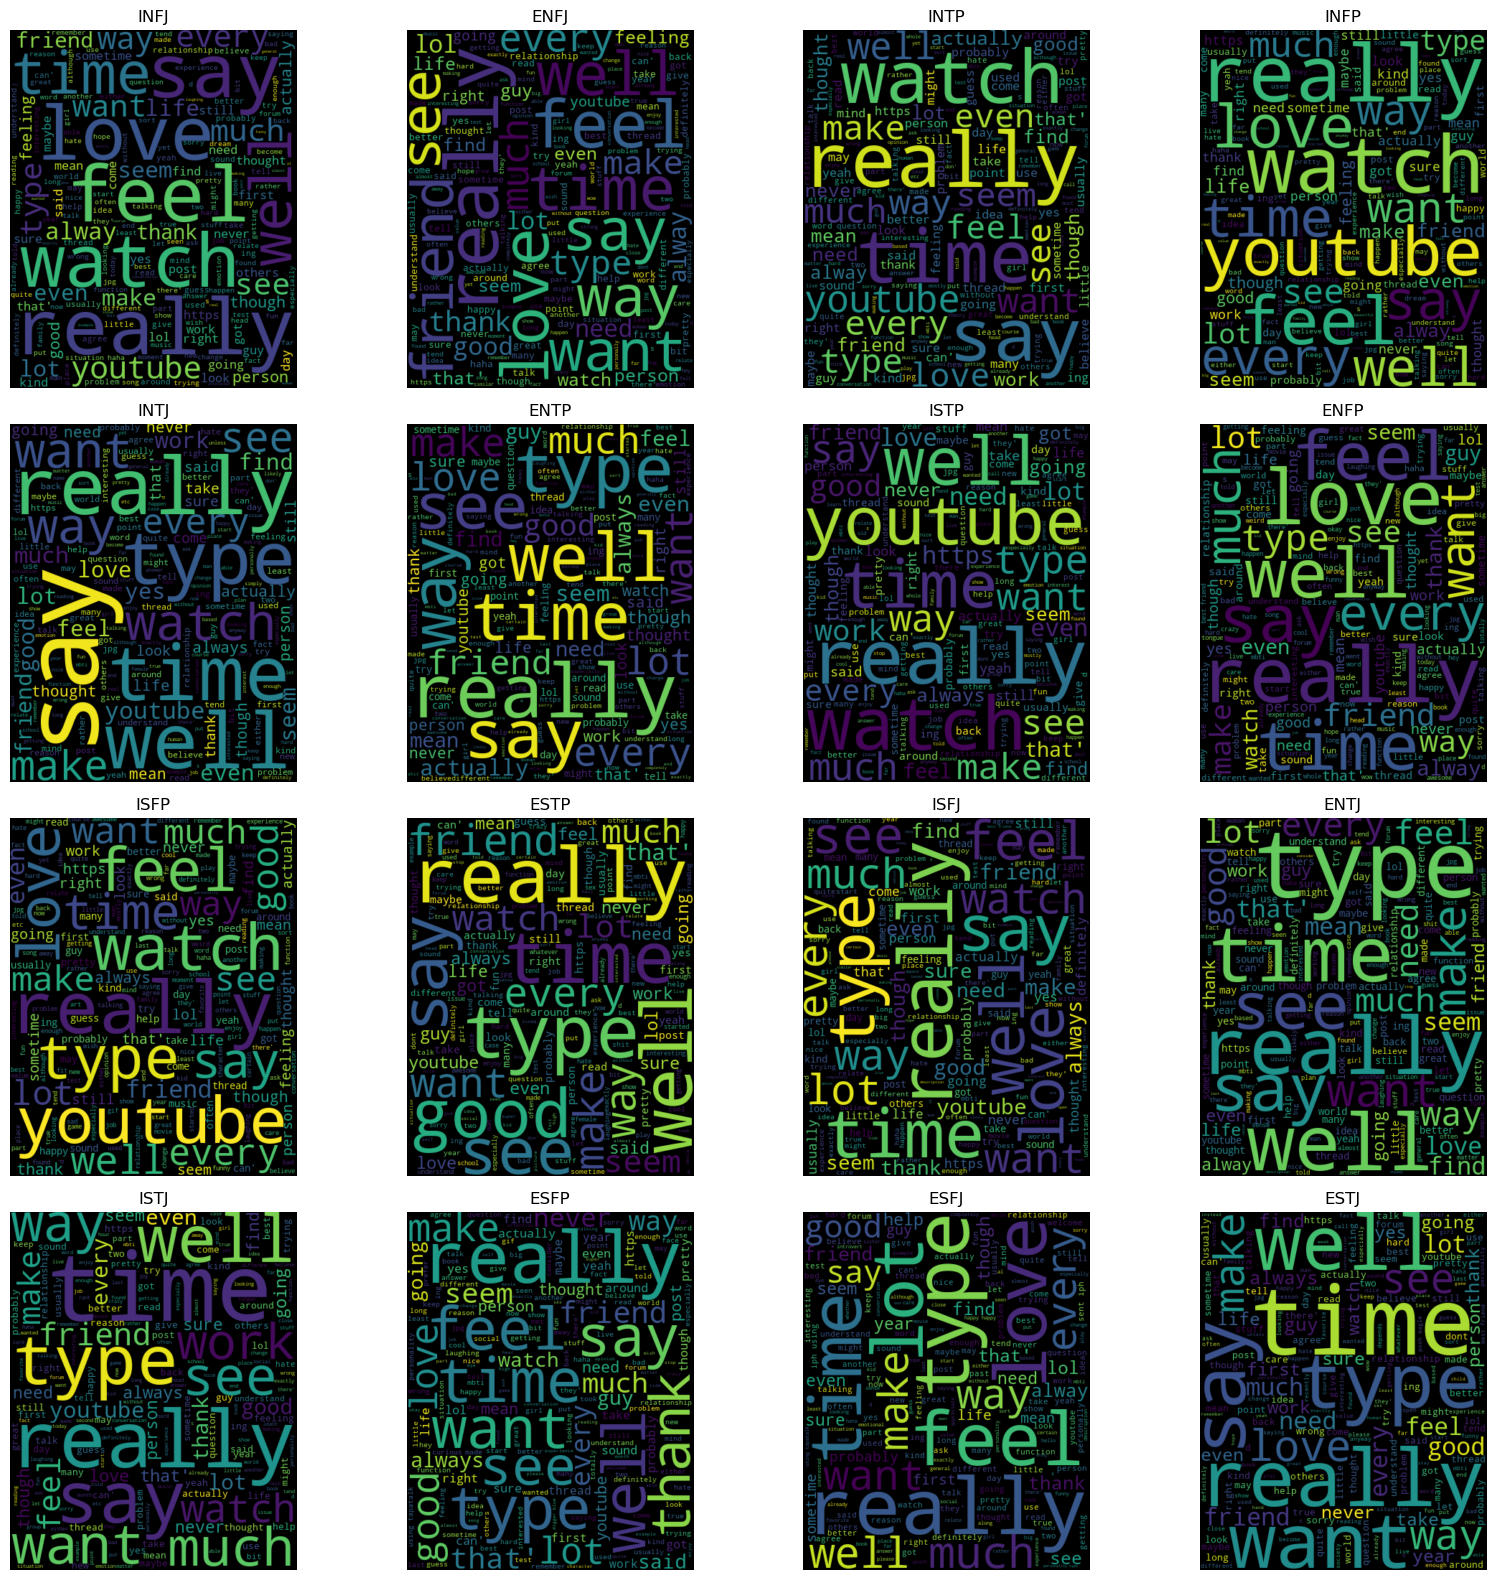

In [41]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
ax = ax.ravel()

for i, mbti_type in enumerate(personality_data["type"].unique()):
    wordcloud_words = " ".join(
        [
            re.sub(r"(people)|(think)|(know)|(thing)|(one)", "", user_posts,)
            for user_posts in personality_data[personality_data["type"] == mbti_type][
                "clean_posts"
            ]
        ]
    )

    wordcloud = WordCloud(height=500).generate(wordcloud_words)
    ax[i].imshow(wordcloud, interpolation="bilinear")
    ax[i].axis("off")
    ax[i].set_title(mbti_type)

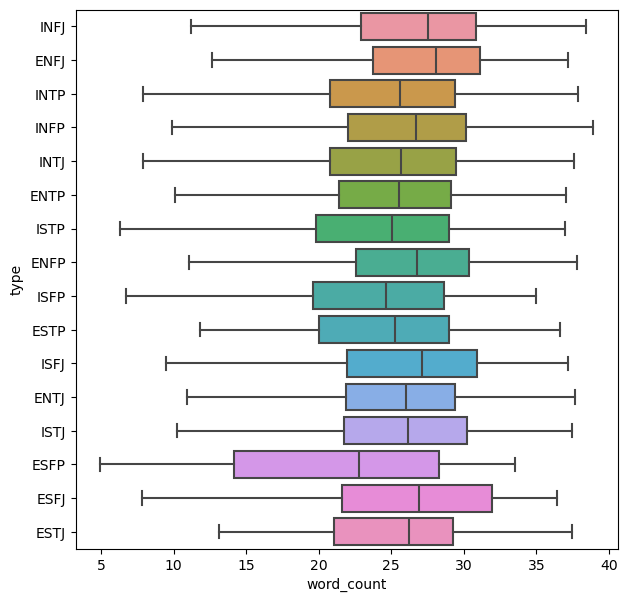

In [42]:
# boxplot of word counts
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="word_count", data=personality_data, showfliers=False)
plt.savefig("box_wordcount.png")

<Axes: xlabel='compound_sentiment', ylabel='type'>

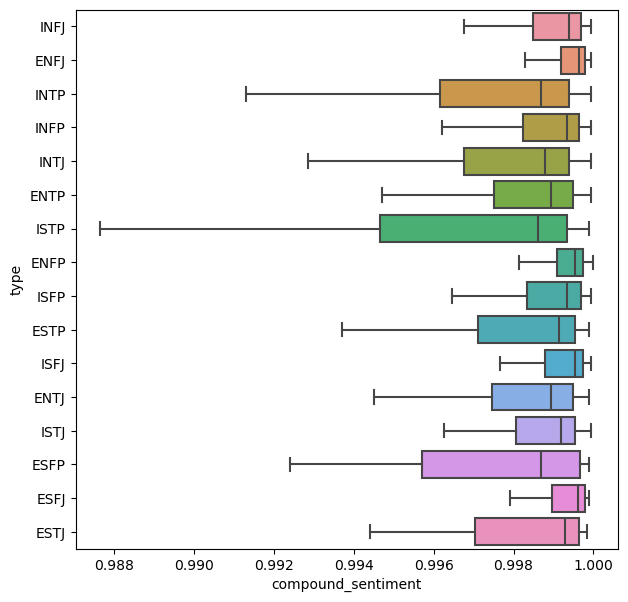

In [43]:
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="compound_sentiment", data=personality_data, showfliers=False)

<Axes: xlabel='pos_sentiment', ylabel='type'>

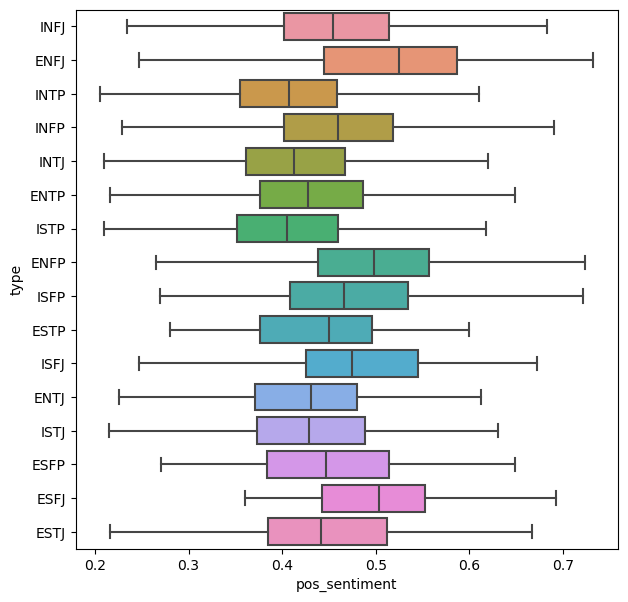

In [44]:
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="pos_sentiment", data=personality_data, showfliers=False)

<Axes: xlabel='neg_sentiment', ylabel='type'>

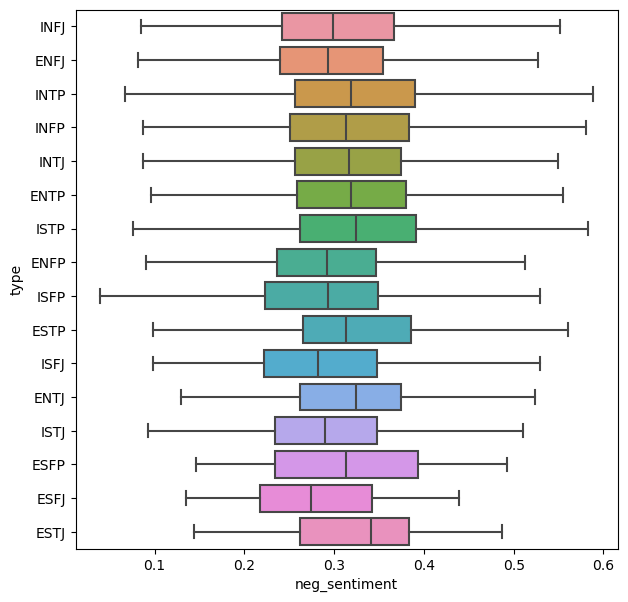

In [45]:
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="neg_sentiment", data=personality_data, showfliers=False)

<Axes: xlabel='neu_sentiment', ylabel='type'>

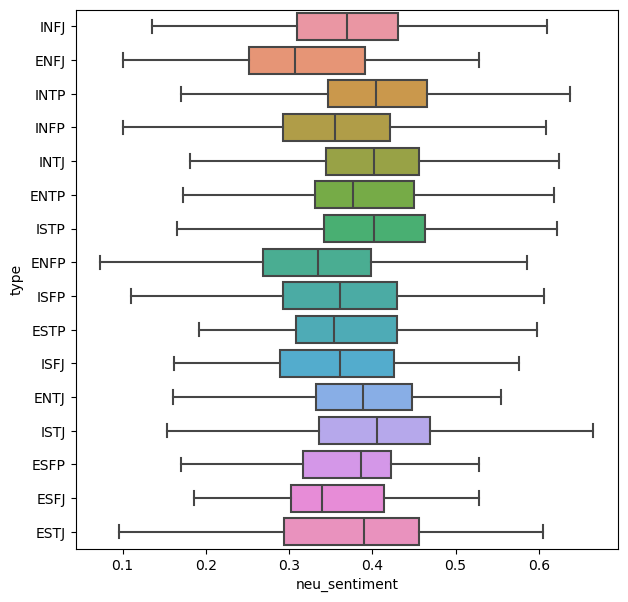

In [46]:
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="neu_sentiment", data=personality_data, showfliers=False)

<Axes: xlabel='qm', ylabel='type'>

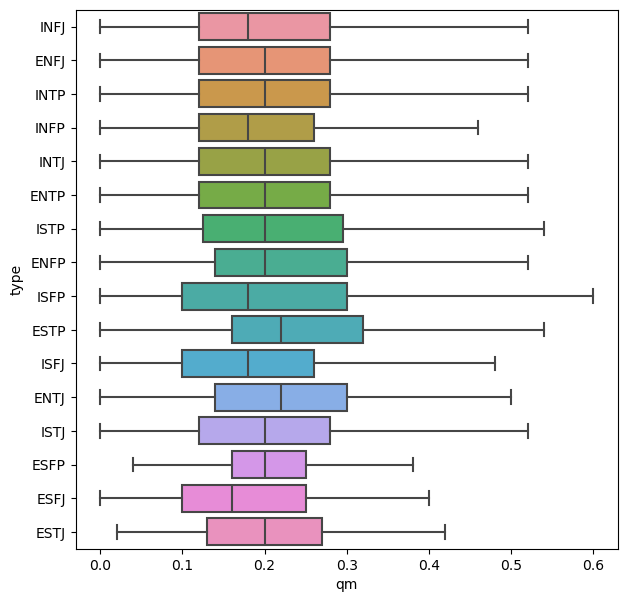

In [47]:
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="qm", data=personality_data, showfliers=False)

<Axes: xlabel='em', ylabel='type'>

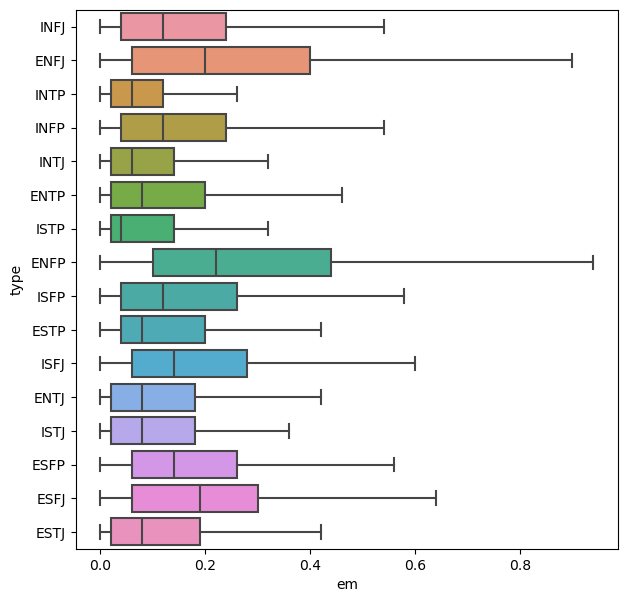

In [48]:
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="em", data=personality_data, showfliers=False)

<Axes: xlabel='colons', ylabel='type'>

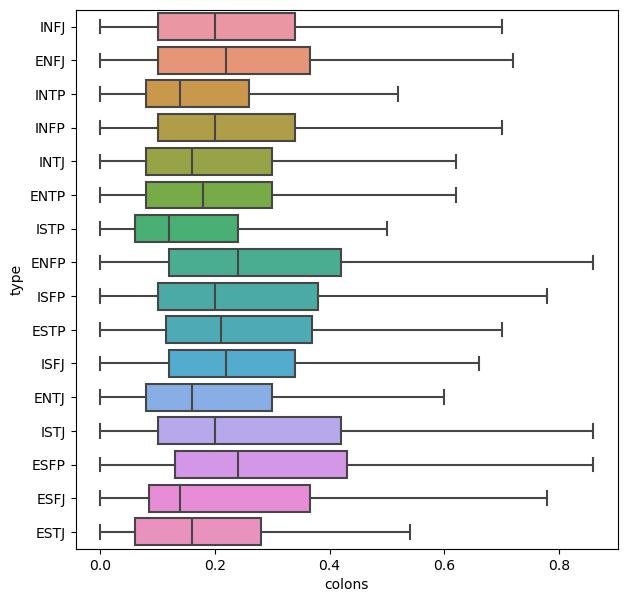

In [49]:
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="colons", data=personality_data, showfliers=False)

<Axes: xlabel='emojis', ylabel='type'>

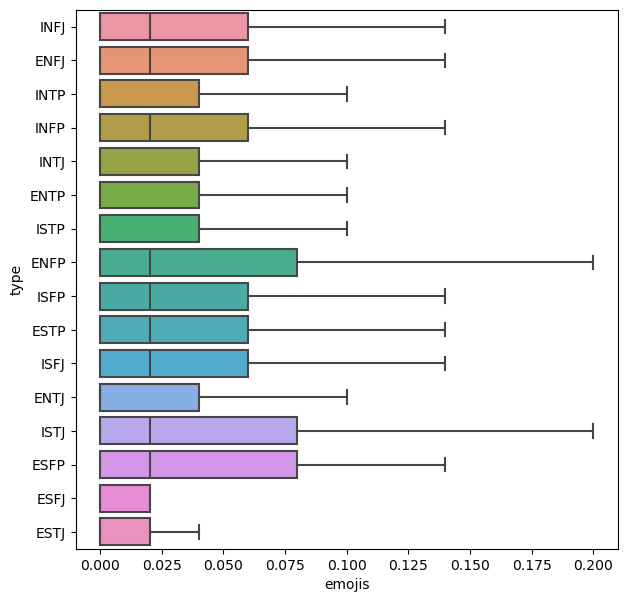

In [50]:
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="emojis", data=personality_data, showfliers=False)

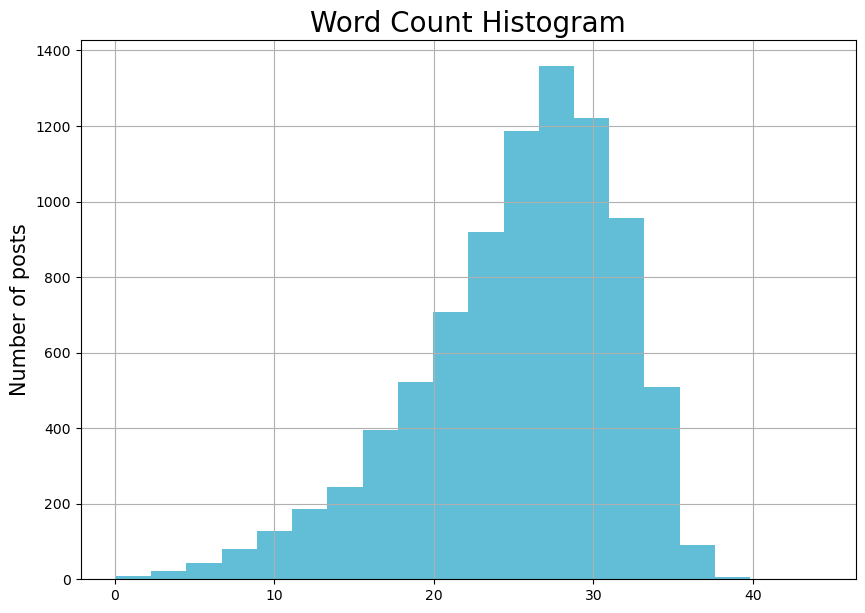

In [51]:
plt.figure(figsize=(10, 7))
plt.title("Word Count Histogram", fontsize=20)
plt.ylabel("Number of posts", fontsize=15)
personality_data["word_count"].hist(bins=20, color=nt)
plt.savefig( "word_hist.png")
plt.show()

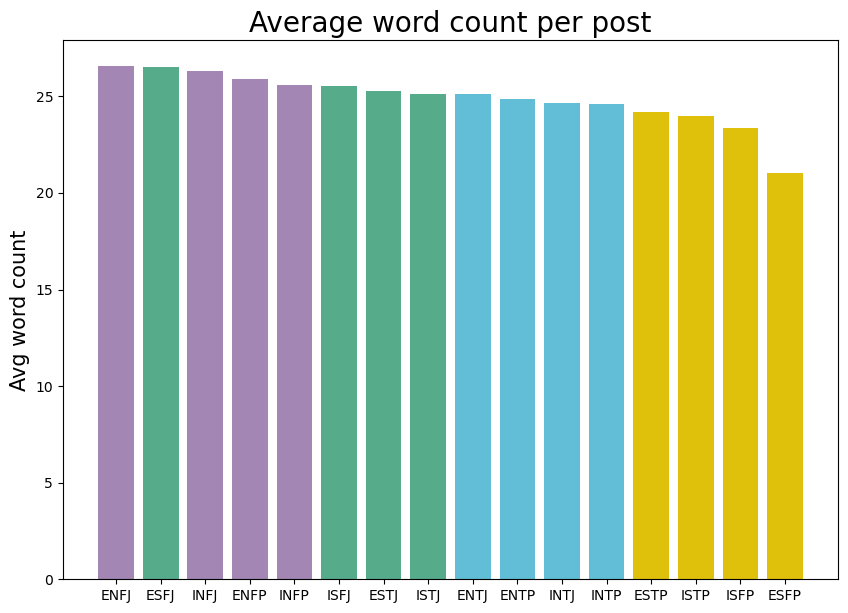

In [52]:
avg_words_type = (
    personality_data.groupby("type")
    .agg({"word_count": "mean"})
    .sort_values("word_count", ascending=False)
)
colors = {x: colors_d[x] for x in avg_words_type.index.tolist()}
plt.figure(figsize=(10, 7))
plt.title("Average word count per post", fontsize=20)
plt.ylabel("Avg word count", fontsize=15)
plt.bar(avg_words_type.index, avg_words_type["word_count"], color=list(colors.values()))
plt.savefig( "avg_words.png")
plt.show()

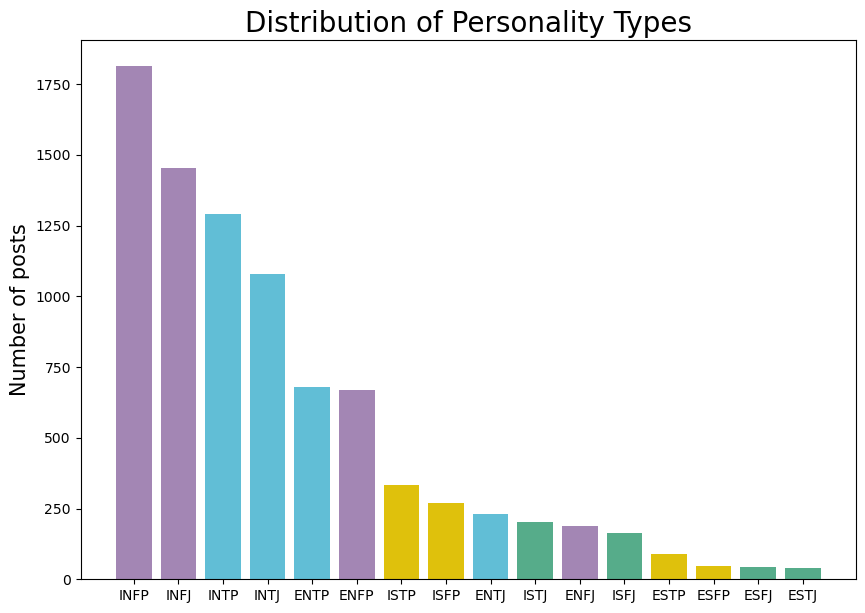

In [53]:
mb = (
    personality_data.groupby("type")
    .agg({"type": "count"})
    .rename(columns={"type": "count"})
    .sort_values("count", ascending=False)
)
colors = {x: colors_d[x] for x in mb.index.tolist()}
plt.figure(figsize=(10, 7))
plt.title("Distribution of Personality Types", fontsize=20)
plt.ylabel("Number of posts", fontsize=15)
plt.bar(mb.index, mb["count"], color=list(colors.values()))
plt.savefig(( "type_hist.png"))
plt.show()